In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

### 1

In [2]:
def F(x, y):
    return np.sin(np.pi * x * 0.25) * np.sin(np.pi * y * 0.25)

In [3]:
A = 8
B = 4
C = 4

In [4]:
def seidel(eps = 10 ** (-2), h = 0.5):
    vert_1 = int(C / h - 1.0)
    vert_2 = int(B / h)
    start_1 = 1
    start_2 = int(0.5 * (A / h) + 1)
    T_= np.zeros((int((B + C) / h + 1), int(A // h + 1))) # T_ - матрица-состояние на предыдущей итерации
    T = np.copy(T_)  
    it = 1
    while True:
        x = []
        for i in reversed(range(T_.shape[0] - 1 - vert_1, T_.shape[0] - 1)):
            for j in range(start_1, T_.shape[1] - 1):
                T[i][j] = 0.25 * (h ** 2 * F(j * h, (B + C - i) * h) + T[i][j - 1] + T[i + 1][j] + T_[i][j + 1] + T_[i - 1][j])
                
        for i in reversed(range(1, vert_2 + 1)):
            for j in range(start_2, T_.shape[1] - 1):
                T[i][j] = 0.25 * (h ** 2 * F(j * h, (B + C - i) * h) + T[i][j - 1] + T[i + 1][j] + T_[i][j + 1] + T_[i - 1][j])
                
        if  np.linalg.norm(np.subtract(T, T_), ord = 1) < eps:
            break
        else:
            it += 1
            T_ = np.copy(T)
            
    print('Количество итераций ', it)
        
    return T

In [5]:
mtx = seidel()
print(mtx)

Количество итераций  34
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.19419539e-01 -2.20757015e-01 -2.88552642e-01
  -3.12447891e-01 -2.88768394e-01 -2.21088333e-01 -1.19689930e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.20514921e-01 -4.07656787e-01 -5.32870271e-01
  -5.77017806e-01 -5.33304842e-01 -4.08324218e-01 -2.21059735e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000

<AxesSubplot:>

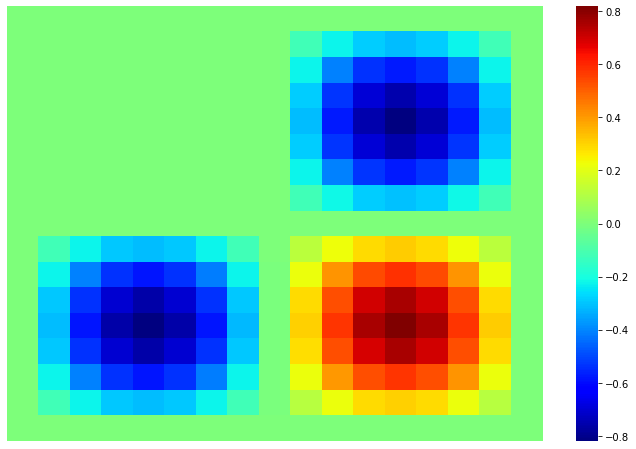

In [6]:
plt.figure(figsize = (12, 8))
sns.heatmap(mtx, cmap = 'jet', xticklabels = False, yticklabels = False)

In [7]:
def f(x, y):
    return mtx[x, y]

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


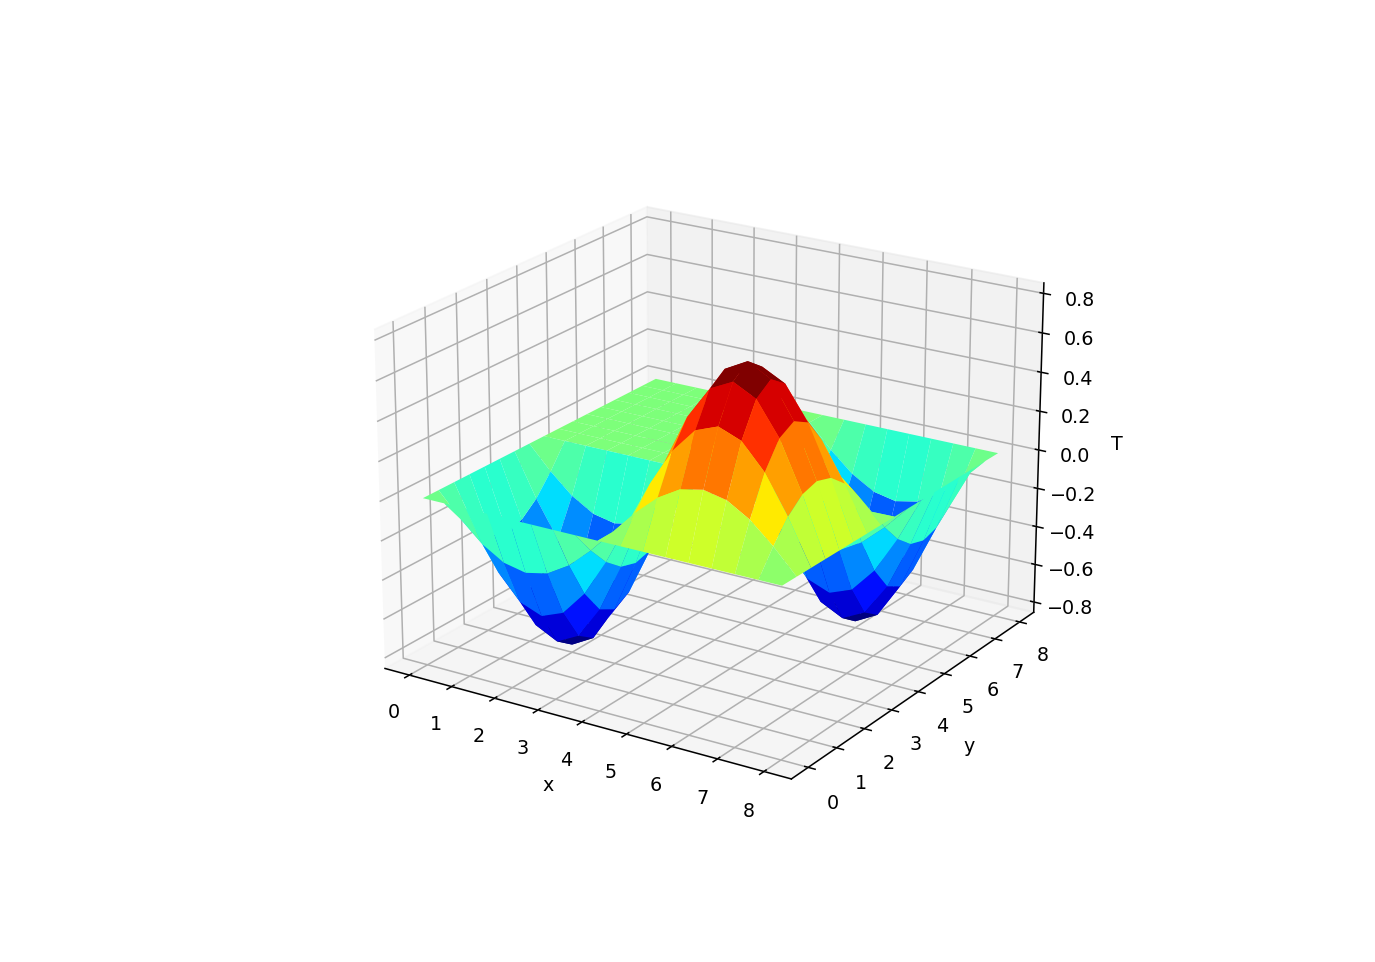

In [9]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.5 + 1))
y = np.arange(0, int((B + C) / 0.5 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.array(x * 0.5), np.flip(np.array(y * 0.5)), f(x, y), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('T')

plt.show()

In [10]:
def u(x, y):
    return 8 / (np.pi ** 2) * F(x, y)

In [11]:
def correct(h = 0.5):
    vert_1 = int(C / h - 1.0)
    vert_2 = int(B / h)
    start_1 = 1
    start_2 = int(0.5 * (A / h) + 1)
    T = np.zeros((int((B + C) / h + 1), int(A // h + 1)))
    for i in reversed(range(T.shape[0] - 1 - vert_1, T.shape[0] - 1)):
        for j in range(start_1, T.shape[1] - 1):
            T[i][j] = u(j * h, (B + C - i) * h)
                
    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, T.shape[1] - 1):
            T[i][j] = u(j * h, (B + C - i) * h)
            
    return T

In [12]:
corr = correct()
print(corr)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -1.18705150e-01 -2.19338518e-01 -2.86579584e-01
  -3.10191507e-01 -2.86579584e-01 -2.19338518e-01 -1.18705150e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -2.19338518e-01 -4.05284735e-01 -5.29530024e-01
  -5.73159168e-01 -5.29530024e-01 -4.05284735e-01 -2.19338518e-01
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -

In [13]:
def f1(x, y):
    return corr[x, y]

<IPython.core.display.Javascript object>


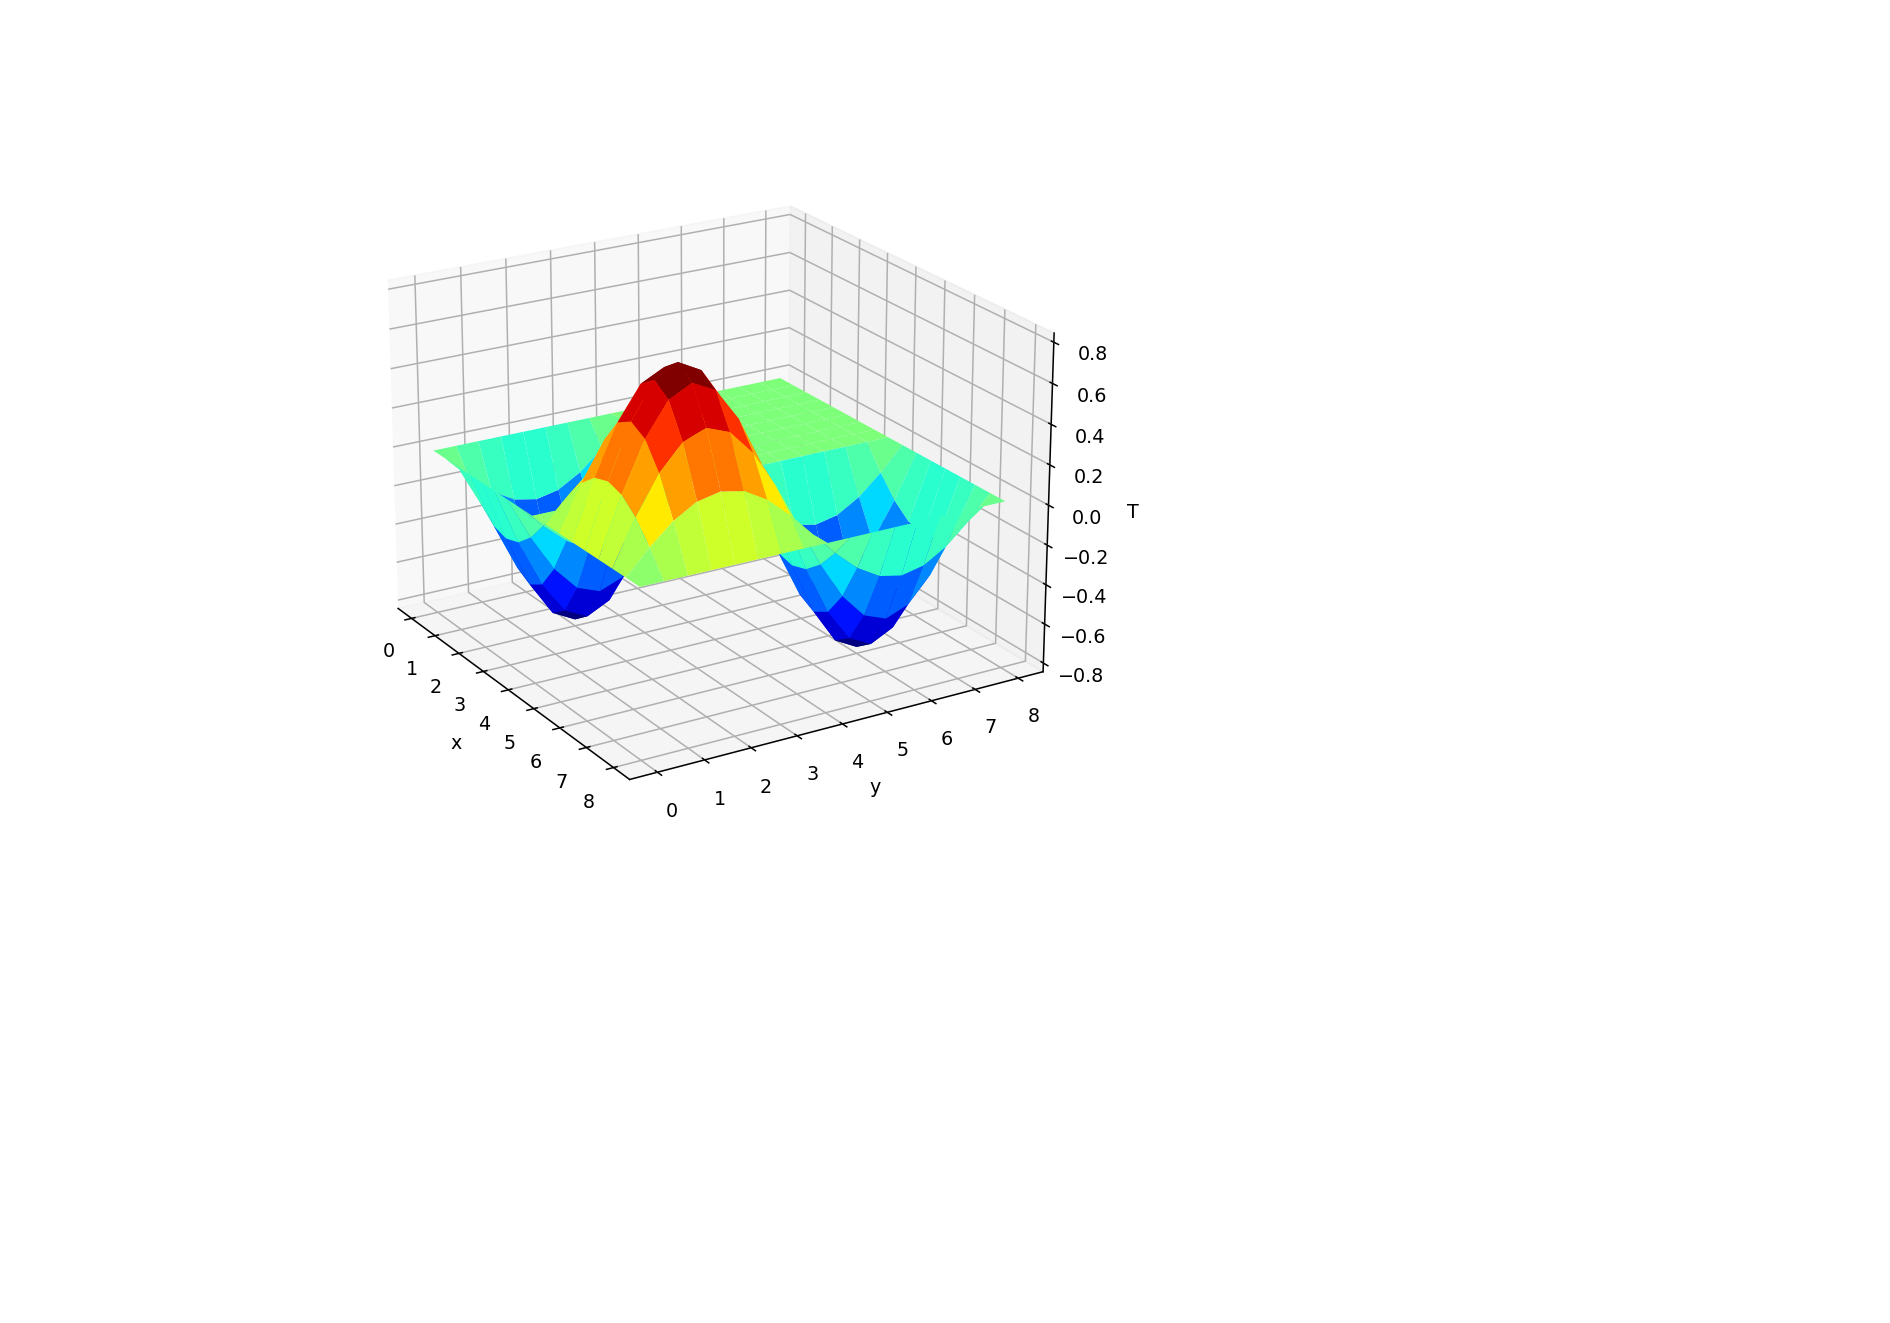

In [14]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.5 + 1))
y = np.arange(0, int((B + C) / 0.5 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.array(x * 0.5), np.flip(np.array(y * 0.5)), f1(x, y), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('T')

plt.show()

<IPython.core.display.Javascript object>


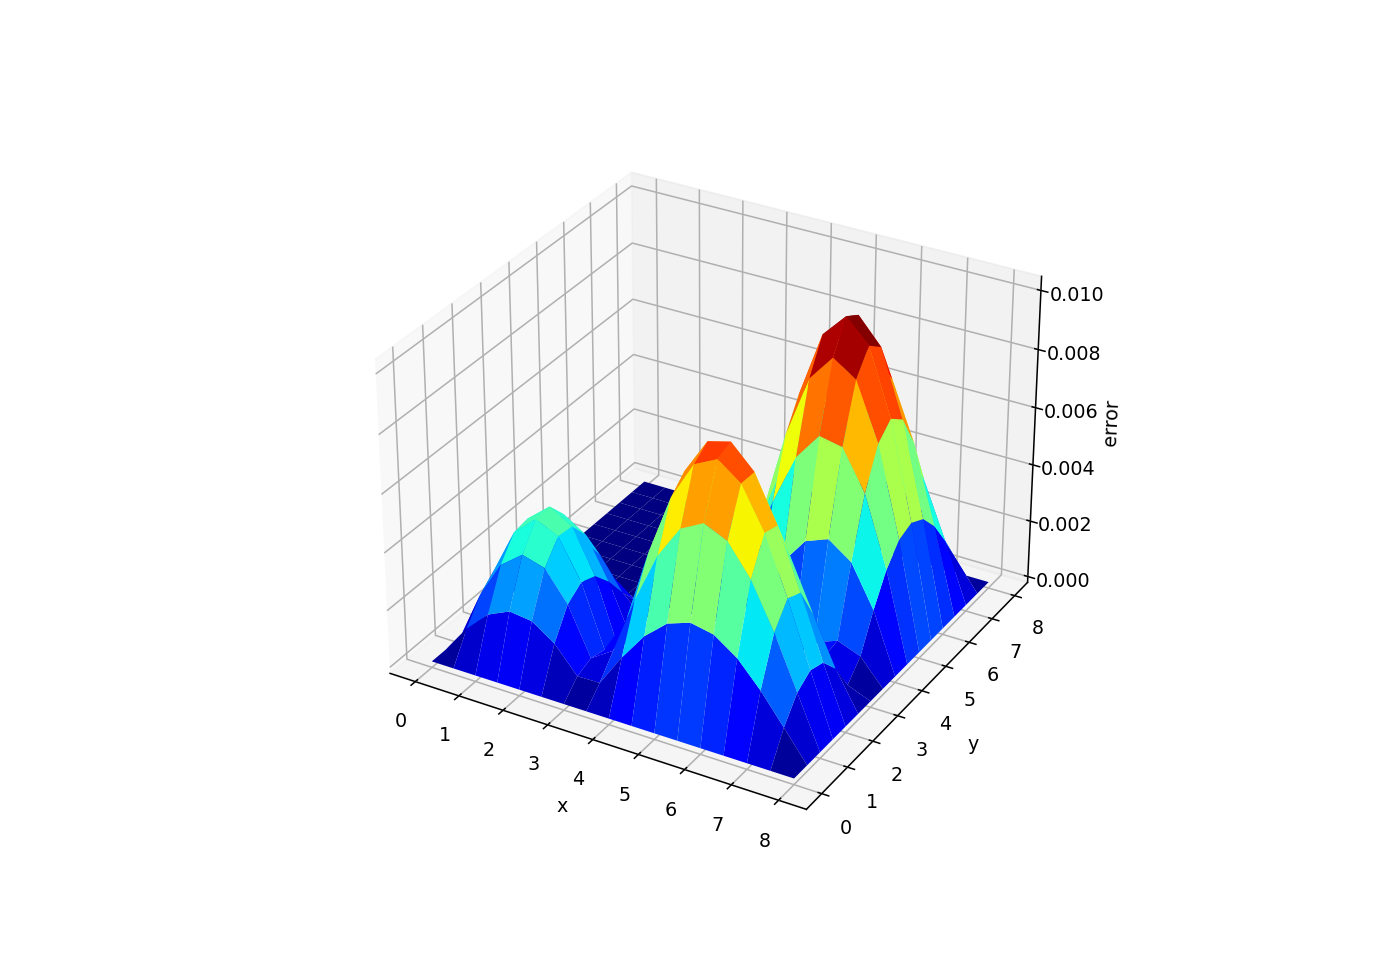

In [15]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.5 + 1))
y = np.arange(0, int((B + C) / 0.5 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.array(x * 0.5), np.flip(np.array(y * 0.5)), np.abs(f1(x, y) - f(x, y)), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('x')
ax_3d.set_ylabel('y')
ax_3d.set_zlabel('error')

plt.show()

### 2

In [16]:
A = 2
B = 1
C = 1

In [17]:
def g(y):
    return np.sin(np.pi * y)

In [18]:
def initial(h = 0.1):
    size_1 = int((B + C) / h + 1)
    size_2 = int(A / h + 1)
    mtx = np.zeros((size_1, size_2))
    for i in reversed(range(int(B / h + 1), size_1 - 1)):
        mtx[i][0] = g(i * h)
    for j in range(1, int((A / 2) / h + 1)):
        mtx[int(B / h)][j] = 0
    for i in reversed(range(1, int(B / h))):
        mtx[i][int((A / 2) / h)] = g(i * h) / np.exp(1)
    for j in range(int((A / 2) / h + 1), size_2 - 1):
        mtx[0][j] = 0
    for i in range(1, size_1 - 1):
        mtx[i][size_2 - 1] = g(i * h) / np.exp(2)
    for j in range(1, size_2 - 1):
        mtx[size_1 -1][j] = 0
    return mtx

In [19]:
init = initial(h = 0.1)
print('Матрица начального приближения при шаге h = 0.1 имеет следующий вид: \n', np.round(init, 5))

Матрица начального приближения при шаге h = 0.1 имеет следующий вид: 
 [[ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.     ]
 [ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.11368  0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.04182]
 [ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.21623  0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.07955]
 [ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.29762  0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.10949]
 [ 0.       0.       0.       0.       0.       0.       0.       0.
   0.       0.       0.34987  0.       0.       0.       0.       0.
   0.       0.       0.       0.       0.12871]

In [20]:
def F(x, y):
    return np.exp(-x) * np.sin(np.pi * y) * (np.pi ** 2 - 1) 

In [21]:
def seidel(eps = 10 ** (-2), h = 0.1):
    vert_1 = int(C / h - 1)
    vert_2 = int(B / h)
    start_1 = 1
    start_2 = int(0.5 * (A / h) + 1)
    T_= np.copy(init) # T_ - матрица-состояние на предыдущей итерации
    T = np.copy(init)  
    it = 1
    while True:
        x = []
        for i in reversed(range(init.shape[0] - 1 - vert_1, init.shape[0] - 1)):
            for j in range(start_1, init.shape[1] - 1):
                T[i][j] = 0.25 * (h ** 2 * F(j * h, i * h) + T[i][j - 1] + T[i + 1][j] + T_[i][j + 1] + T_[i - 1][j])
                
        for i in reversed(range(1, vert_2 + 1)):
            for j in range(start_2, init.shape[1] - 1):
                T[i][j] = 0.25 * (h ** 2 * F(j * h, i * h) + T[i][j - 1] + T[i + 1][j] + T_[i][j + 1] + T_[i - 1][j])
                
        if  np.linalg.norm(np.subtract(T, T_), ord = 1) < eps:
            break
        else:
            it += 1
            T_ = np.copy(T)
            
    print('Количество итераций ', it)
        
    return T

In [22]:
mtx = seidel()
print(mtx)

Количество итераций  49
[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.13680999e-01  1.02922542e-01
   9.31540275e-02  8.42993393e-02  7.62832904e-02  6.90322872e-02
   6.24746026e-02  5.65405600e-02  5.11628152e-02  4.62767569e-02
   4.18209025e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.16234110e-01  1.95769252e-01
   1.77188166e-01  1.60345402e-01  1.45097767e-01  1.31305431e-01
   1.18832177e

<IPython.core.display.Javascript object>


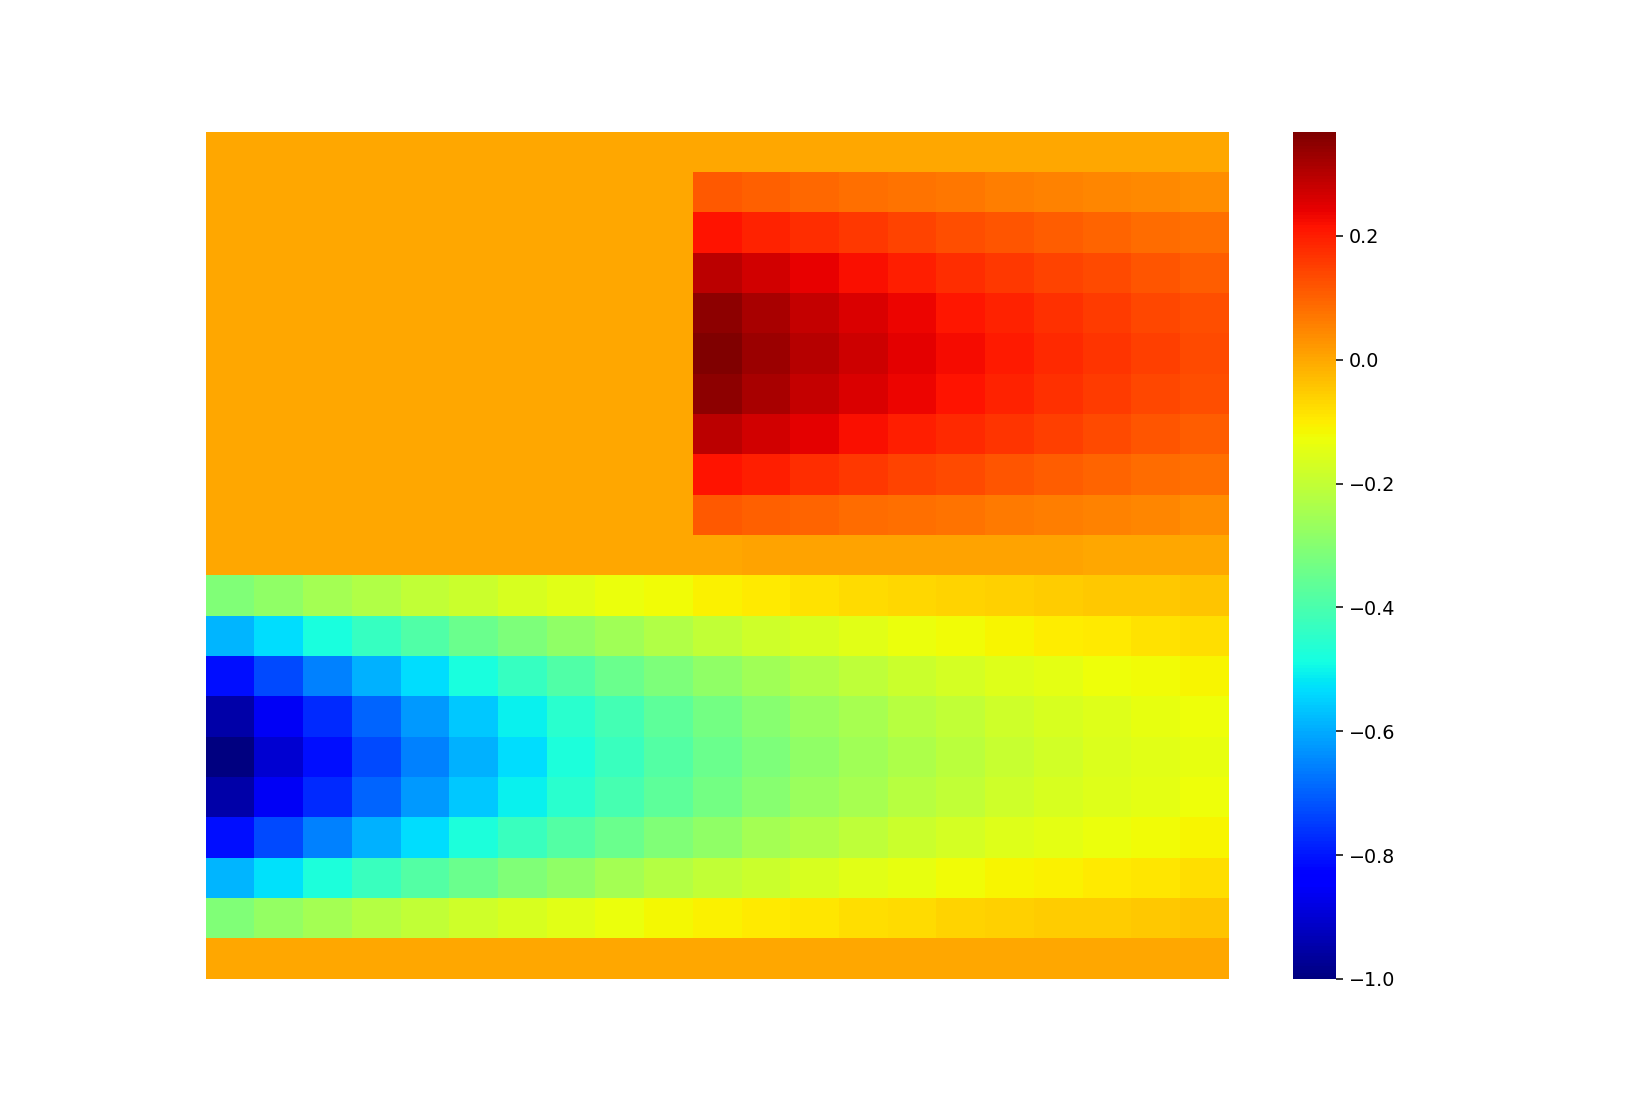

<AxesSubplot:>

In [23]:
plt.figure(figsize = (12, 8))
sns.heatmap(mtx, cmap = 'jet', xticklabels = False, yticklabels = False)

In [24]:
def f(x, y):
    return mtx[x, y]

<IPython.core.display.Javascript object>


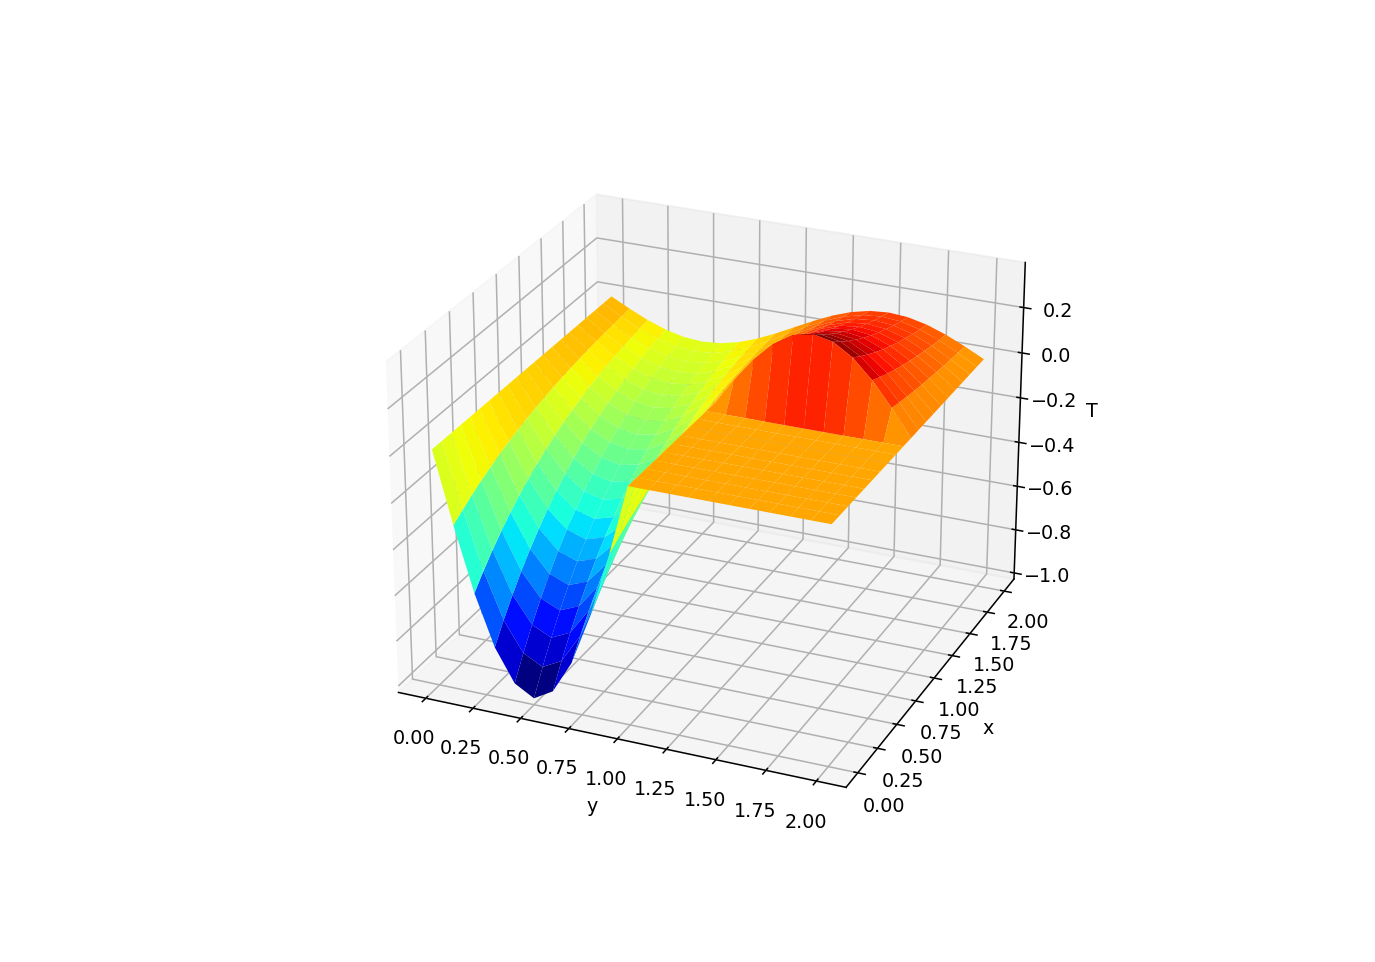

In [25]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.1 + 1))
y = np.arange(0, int((B + C) / 0.1 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.flip(np.array(x * 0.1)), np.array(y * 0.1), f(x, y), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('y')
ax_3d.set_ylabel('x')
ax_3d.set_zlabel('T')

plt.show()

In [26]:
def u(x, y):
    return np.exp(-x) * np.sin(np.pi * y)

In [27]:
def correct(h = 0.1):
    vert_1 = int(C / h - 1.0)
    vert_2 = int(B / h)
    start_1 = 1
    start_2 = int(0.5 * (A / h) + 1)
    T = np.copy(init)
    for i in reversed(range(T.shape[0] - 1 - vert_1, T.shape[0] - 1)):
        for j in range(start_1, T.shape[1] - 1):
            T[i][j] = u(j * h, i * h)
                
    for i in reversed(range(1, vert_2 + 1)):
        for j in range(start_2, T.shape[1] - 1):
            T[i][j] = u(j * h, i * h)
            
    return T

In [28]:
corr = correct()
print(corr)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  1.13680999e-01  1.02862822e-01
   9.30741301e-02  8.42169556e-02  7.62026526e-02  6.89510114e-02
   6.23894552e-02  5.64523135e-02  5.10801656e-02  4.62192452e-02
   4.18209025e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  2.16234110e-01  1.95656714e-01
   1.77037516e-01  1.60190169e-01  1.44946059e-01  1.31152617e-01
   1.18671796e-01  1.07378681e-01  9.7

In [29]:
def f1(x, y):
    return corr[x, y]

<IPython.core.display.Javascript object>


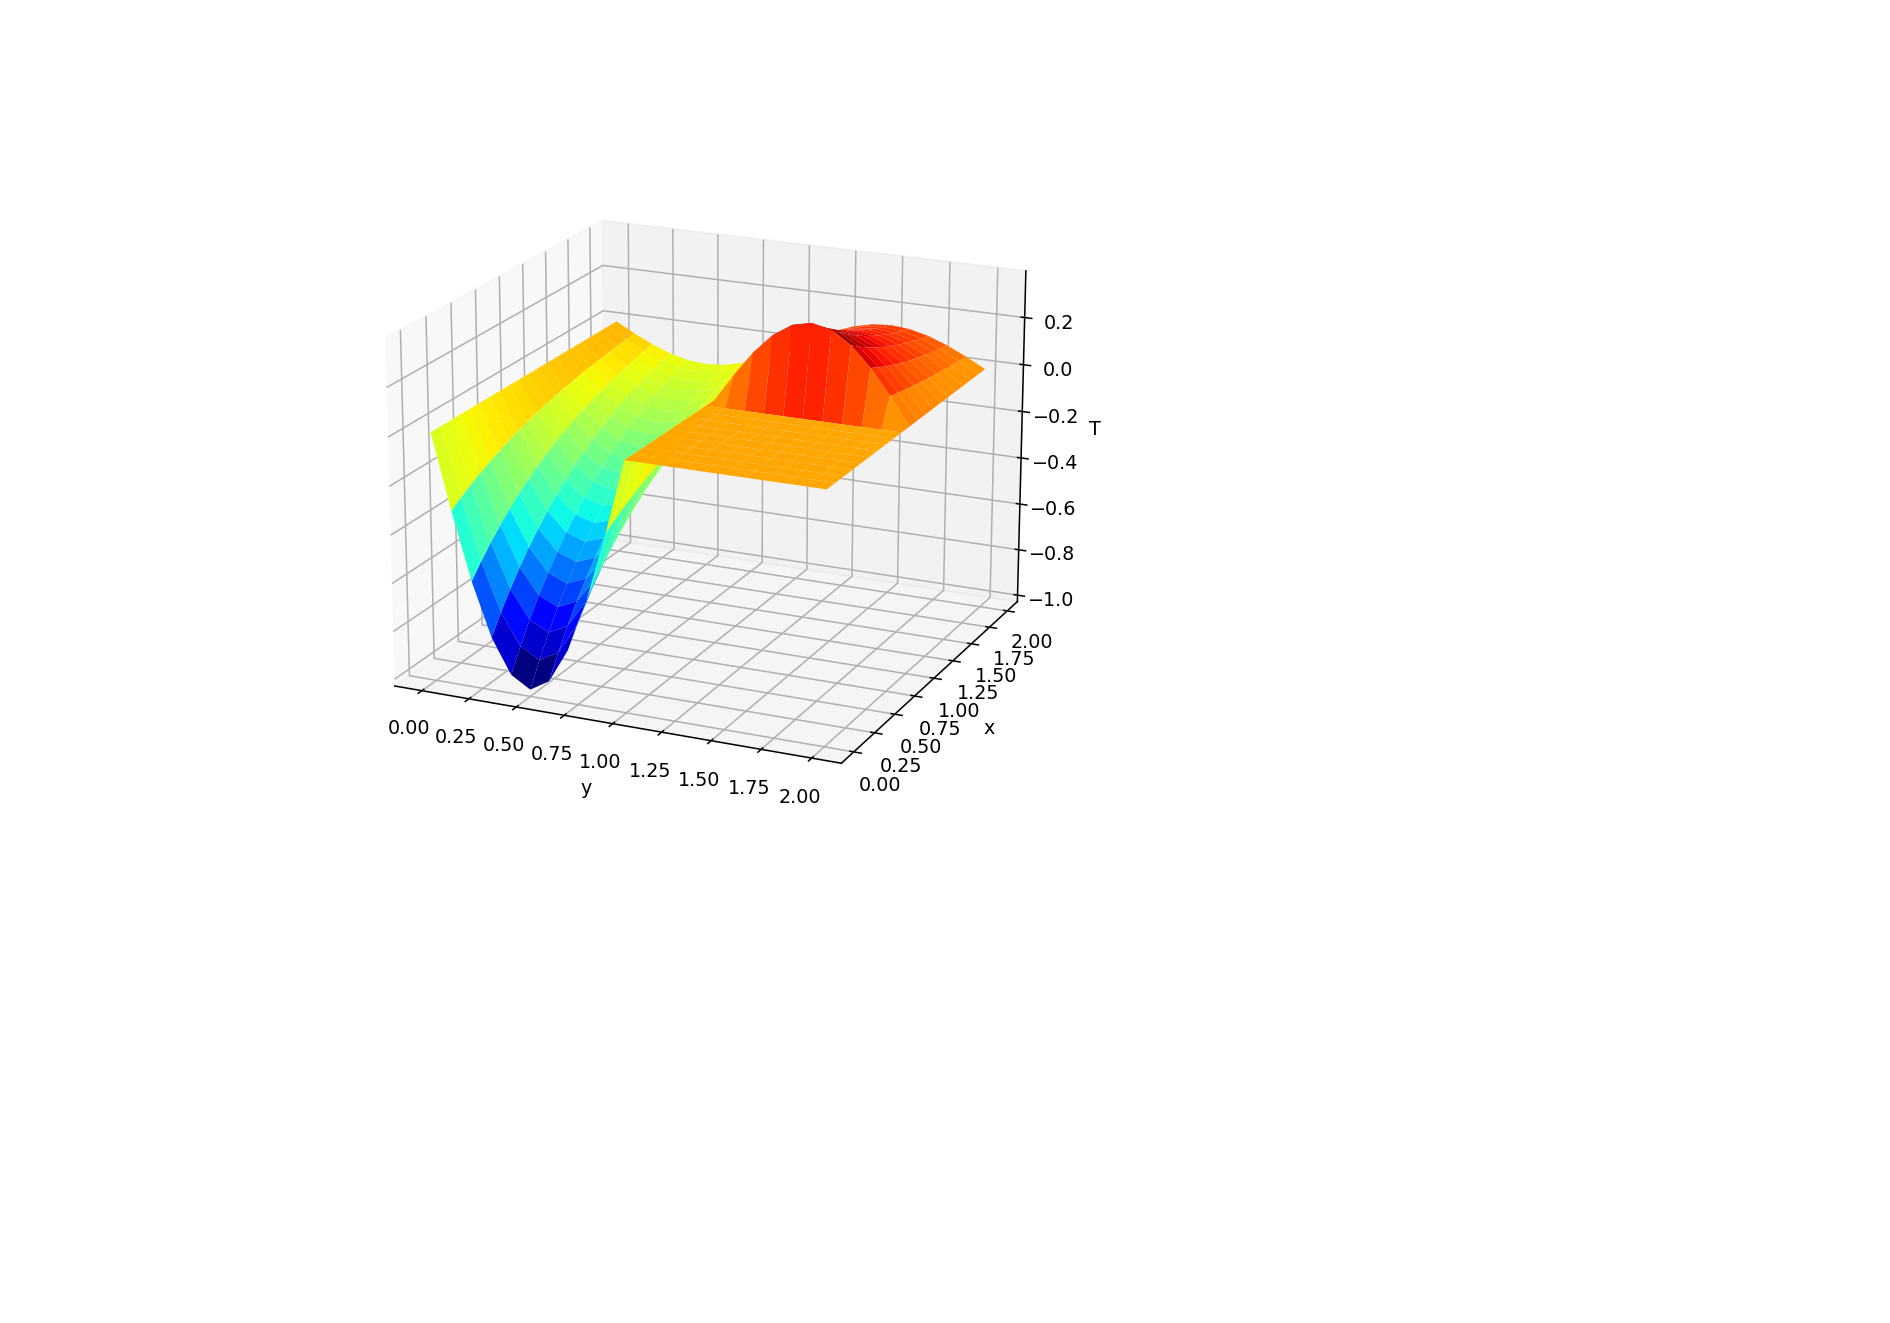

In [30]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.1 + 1))
y = np.arange(0, int((B + C) / 0.1 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.flip(np.array(x * 0.1)), np.array(y * 0.1), f1(x, y), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('y')
ax_3d.set_ylabel('x')
ax_3d.set_zlabel('T')

plt.show()

<IPython.core.display.Javascript object>


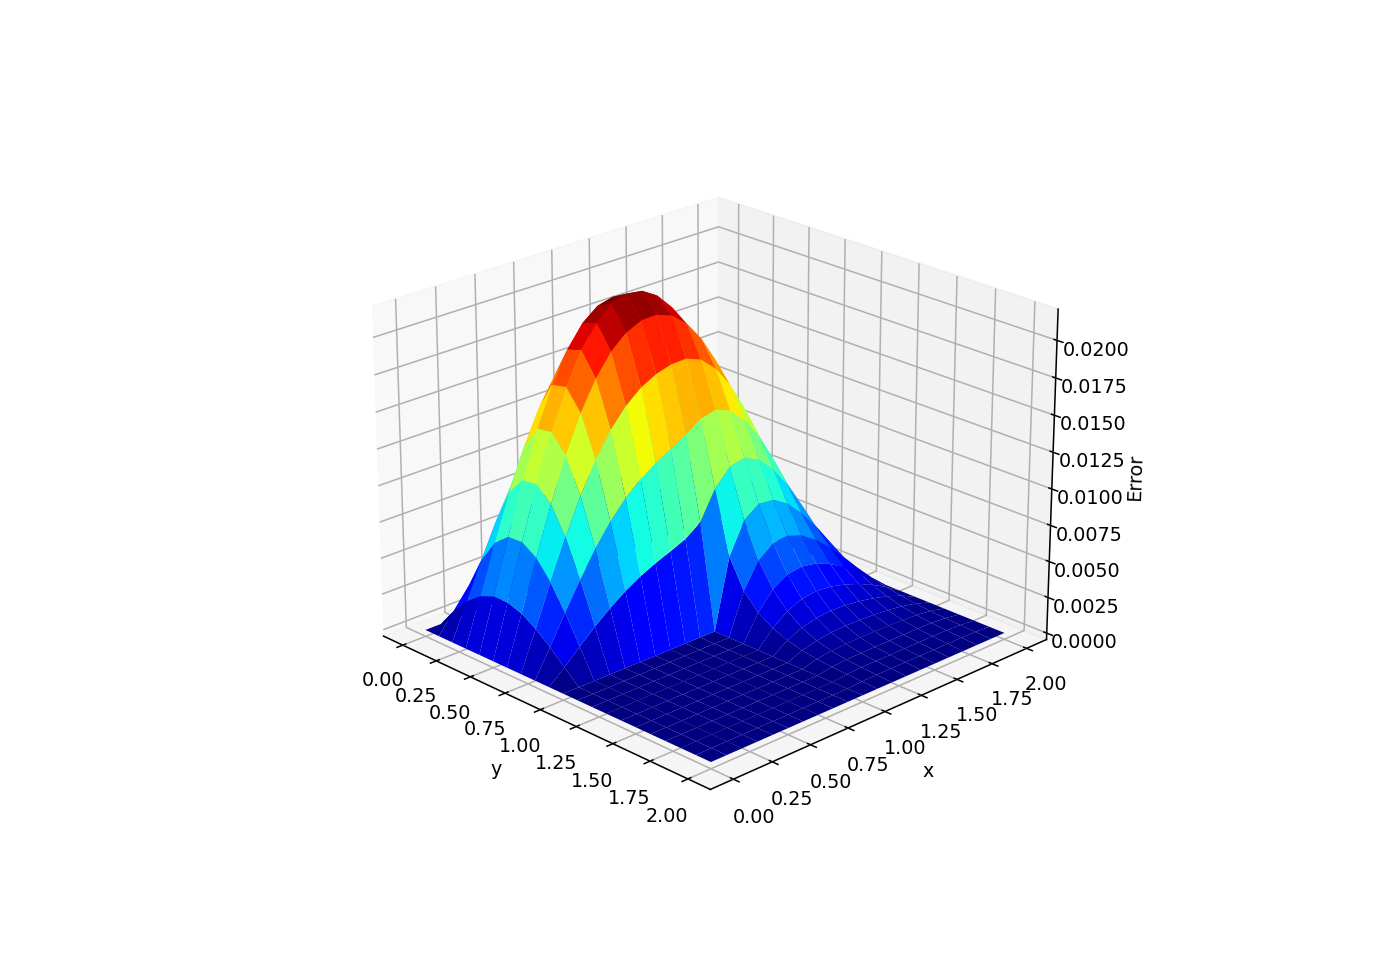

In [31]:
fig = plt.figure(figsize=(10, 7))
ax_3d = fig.add_subplot(projection='3d')

x = np.arange(0, int(A / 0.1 + 1))
y = np.arange(0, int((B + C) / 0.1 + 1))

x, y = np.meshgrid(x, y)

ax_3d.plot_surface(np.flip(np.array(x * 0.1)), np.array(y * 0.1), np.abs(f1(x, y) - f(x, y)), rstride = 1, cstride = 1, cmap = 'jet', color = 'y')

ax_3d.set_xlabel('y')
ax_3d.set_ylabel('x')
ax_3d.set_zlabel('Error')

plt.show()